In [1]:
import os
if not os.path.isdir('database'):
    os.chdir("..")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import technical

In [3]:
currency_pair = "eurusd"
df = pd.read_pickle(f"database/{currency_pair}.pkl")
# there are duplicate indexes
df = df.drop(df[df.index.duplicated()].index)

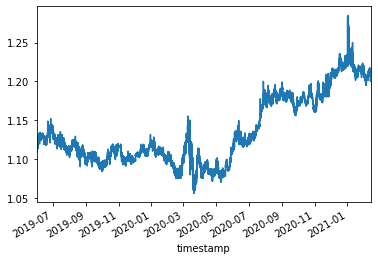

In [4]:
df.close.plot()

In [5]:
df.head()

,high,timestamp,volume,low,close,open
timestamp,,,,,,
2019-06-01 00:03:00,1.1112,1559347380,0.0,1.1112,1.1112,1.1112
2019-06-01 00:04:00,1.1112,1559347440,0.0,1.1112,1.1112,1.1112
2019-06-01 00:05:00,1.1112,1559347500,0.0,1.1112,1.1112,1.1112
2019-06-01 00:06:00,1.1112,1559347560,0.0,1.1112,1.1112,1.1112
2019-06-01 00:07:00,1.1112,1559347620,0.0,1.1112,1.1112,1.1112


In [6]:
(df.high == df.close).all()

False

In [7]:
bp = df.close - np.minimum(df.close.shift(1), df.low)
bp.head()

timestamp
2019-06-01 00:03:00    NaN
2019-06-01 00:04:00    0.0
2019-06-01 00:05:00    0.0
2019-06-01 00:06:00    0.0
2019-06-01 00:07:00    0.0
dtype: float64

In [8]:
tr = np.maximum(df.high, df.close.shift(1)) - np.minimum(df.close.shift(1), df.low)
tr.head()

timestamp
2019-06-01 00:03:00    NaN
2019-06-01 00:04:00    0.0
2019-06-01 00:05:00    0.0
2019-06-01 00:06:00    0.0
2019-06-01 00:07:00    0.0
dtype: float64

In [9]:
days = 10

In [10]:
avg1 = bp.rolling(days).sum()/tr.rolling(days).sum()
avg2 = bp.rolling(2*days).sum()/tr.rolling(2*days).sum()
avg3 = bp.rolling(3*days).sum()/tr.rolling(3*days).sum()
ult = 100 * (4*avg1 + 2*avg2 + avg3)/7

In [11]:
df_ = df.loc[~ult.isna()]

In [12]:
df_.head()

,high,timestamp,volume,low,close,open
timestamp,,,,,,
2019-06-01 01:12:00,1.11318,1559351520,202.04890,1.11318,1.11318,1.11318
2019-06-01 01:13:00,1.11275,1559351580,1942.66766,1.11275,1.11275,1.11275
2019-06-01 01:14:00,1.11275,1559351640,0.00000,1.11275,1.11275,1.11275
2019-06-01 01:15:00,1.11365,1559351700,59.04147,1.11365,1.11365,1.11365
2019-06-01 01:16:00,1.11365,1559351760,0.00000,1.11365,1.11365,1.11365


In [13]:
df_["ult"] = ult.dropna()

/home/giulio/prog/.virtualenv/ML/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
token = 0
buy = []
sell = []
gain = []
for idx, row in enumerate(df_.ult):
    if row <= 30 and token == 0:
        buyvalue = df_.close.iloc[idx]
        print(f"Buying at {buyvalue}")
        token = 1
        buy.append(1)
        sell.append(0)
    elif row >= 70 and token == 1:
        sellvalue = df_.close.iloc[idx]
        print(f"Selling at {sellvalue}, {sellvalue/buyvalue - 1}")
        token = 0
        buy.append(0)
        sell.append(1)
        gain.append(sellvalue/buyvalue - 1)
    else:
        buy.append(0)
        sell.append(0)

Buying at 1.1121
Selling at 1.11598, 0.0034888948835536393
Buying at 1.11582
Selling at 1.11617, 0.00031367066372722796
Buying at 1.11356
Selling at 1.11832, 0.004274578828262321
Buying at 1.1155
Selling at 1.1155, 0.0
Buying at 1.11501
Selling at 1.1155, 0.0004394579420812228
Buying at 1.11502
Selling at 1.115, -1.7936897992787415e-05
Buying at 1.11402
Selling at 1.11299, -0.0009245794509973315
Buying at 1.114
Selling at 1.115, 0.0008976660682225024
Buying at 1.115
Selling at 1.11307, -0.001730941704035871
Buying at 1.11337
Selling at 1.11656, 0.0028651750990236202
Buying at 1.11631
Selling at 1.11651, 0.00017916170239451468
Buying at 1.1141
Selling at 1.11501, 0.0008168028004666983
Buying at 1.113
Selling at 1.114, 0.0008984725965859308
Buying at 1.113
Selling at 1.114, 0.0008984725965859308
Buying at 1.11584
Selling at 1.116, 0.0001433897332951961
Buying at 1.115
Selling at 1.116, 0.0008968609865471766
Buying at 1.11598
Selling at 1.115, -0.0008781519382067282
Buying at 1.117
Sellin

Buying at 1.12744
Selling at 1.13, 0.002270630809621643
Buying at 1.12752
Selling at 1.13146, 0.003494394777919574
Buying at 1.127
Selling at 1.13004, 0.0026974267968056242
Buying at 1.12652
Selling at 1.13037, 0.003417604658594753
Buying at 1.12749
Selling at 1.13207, 0.0040621202848805105
Buying at 1.12677
Selling at 1.12705, 0.00024849791882997074
Buying at 1.12742
Selling at 1.13136, 0.003494704724060105
Buying at 1.12509
Selling at 1.12851, 0.0030397568194544533
Buying at 1.12535
Selling at 1.12996, 0.0040965033100812676
Buying at 1.12631
Selling at 1.12767, 0.0012074828422015127
Buying at 1.12742
Selling at 1.12995, 0.0022440616629118004
Buying at 1.12959
Selling at 1.12872, -0.0007701909542401353
Buying at 1.12807
Selling at 1.12858, 0.00045209960374803515
Buying at 1.12858
Selling at 1.13178, 0.0028354215031278773
Buying at 1.1272
Selling at 1.12811, 0.0008073101490417844
Buying at 1.12742
Selling at 1.128, 0.0005144489187700607
Buying at 1.12799
Selling at 1.12897, 0.000868802

Selling at 1.11264, 0.00037762313211420206
Buying at 1.11215
Selling at 1.11193, -0.00019781504293470142
Buying at 1.11113
Selling at 1.11185, 0.0006479889841872755
Buying at 1.1112
Selling at 1.1117, 0.00044996400287966587
Buying at 1.1101
Selling at 1.11167, 0.0014142870011708553
Buying at 1.11065
Selling at 1.11161, 0.0008643587088641436
Buying at 1.1105
Selling at 1.11151, 0.000909500225123816
Buying at 1.11084
Selling at 1.11139, 0.0004951208094776671
Buying at 1.10906
Selling at 1.11172, 0.002398427497159794
Buying at 1.10914
Selling at 1.10953, 0.0003516237805867295
Buying at 1.11116
Selling at 1.11061, -0.0004949782209581199
Buying at 1.10648
Selling at 1.11006, 0.0032354855035789942
Buying at 1.10522
Selling at 1.11017, 0.004478746312951198
Buying at 1.11008
Selling at 1.11009, 9.00835975792269e-06
Buying at 1.11009
Selling at 1.11026, 0.00015314073633665437
Buying at 1.10648
Selling at 1.11, 0.0031812594895526125
Buying at 1.10806
Selling at 1.10999, 0.0017417829359420711
Buy

Buying at 1.10273
Selling at 1.10298, 0.00022671007408892052
Buying at 1.10113
Selling at 1.10297, 0.0016710106890194254
Buying at 1.10153
Selling at 1.1009, -0.0005719317676322611
Buying at 1.10049
Selling at 1.10087, 0.00034530072967497993
Buying at 1.1009
Selling at 1.10298, 0.0018893632482515077
Buying at 1.10115
Selling at 1.10115, 0.0
Buying at 1.10092
Selling at 1.10093, 9.083312138891131e-06
Buying at 1.10103
Selling at 1.10105, 1.816480931493558e-05
Buying at 1.10002
Selling at 1.10299, 0.0026999509099834285
Buying at 1.10071
Selling at 1.10624, 0.005024029944308506
Buying at 1.10001
Selling at 1.10616, 0.005590858264924892
Buying at 1.10001
Selling at 1.10073, 0.0006545395041863689
Buying at 1.10232
Selling at 1.09646, -0.0053160606720371595
Buying at 1.10052
Selling at 1.09952, -0.000908661360084273
Buying at 1.09952
Selling at 1.09997, 0.0004092694994177748
Buying at 1.099
Selling at 1.09987, 0.0007916287534122102
Buying at 1.09992
Selling at 1.09993, 9.091570296160256e-06


Selling at 1.10874, 0.001472301758632888
Buying at 1.10729
Selling at 1.10876, 0.0013275654977467077
Buying at 1.11104
Selling at 1.11231, 0.0011430731566819397
Buying at 1.10954
Selling at 1.11091, 0.0012347459307462394
Buying at 1.11164
Selling at 1.11189, 0.00022489295095540207
Buying at 1.11191
Selling at 1.11198, 6.295473554507325e-05
Buying at 1.11179
Selling at 1.11186, 6.296153050477926e-05
Buying at 1.11181
Selling at 1.11182, 8.994342558521495e-06
Buying at 1.11188
Selling at 1.11199, 9.89315393749024e-05
Buying at 1.10954
Selling at 1.1098, 0.00023433134452099935
Buying at 1.10979
Selling at 1.11233, 0.002288721289613438
Buying at 1.10979
Selling at 1.1125, 0.0024419034231701886
Buying at 1.10982
Selling at 1.111, 0.001063235479627389
Buying at 1.11147
Selling at 1.1125, 0.0009267006756819018
Buying at 1.11247
Selling at 1.113, 0.0004764173415912065
Buying at 1.11594
Selling at 1.11599, 4.480527626937736e-05
Buying at 1.11582
Selling at 1.11591, 8.065817067270942e-05
Buying 

Buying at 1.07851
Selling at 1.08399, 0.005081084088232712
Buying at 1.07958
Selling at 1.08394, 0.004038607606661859
Buying at 1.0753
Selling at 1.08272, 0.006900399888403186
Buying at 1.08194
Selling at 1.08401, 0.0019132299388135987
Buying at 1.07802
Selling at 1.07822, 0.00018552531492921354
Buying at 1.08273
Selling at 1.0831, 0.00034172877818106073
Buying at 1.0831
Selling at 1.08276, -0.0003139137660419511
Buying at 1.0778
Selling at 1.08004, 0.0020783076637593823
Buying at 1.08328
Selling at 1.08079, -0.00229857469906225
Buying at 1.07917
Selling at 1.08314, 0.0036787531158204434
Buying at 1.08321
Selling at 1.08305, -0.00014770912380790424
Buying at 1.07888
Selling at 1.08515, 0.005811582381729297
Buying at 1.08534
Selling at 1.08551, 0.00015663294451506715
Buying at 1.084
Selling at 1.08599, 0.0018357933579336017
Buying at 1.084
Selling at 1.08452, 0.00047970479704773084
Buying at 1.08439
Selling at 1.08598, 0.001466262138160701
Buying at 1.07911
Selling at 1.08581, 0.0062088

Selling at 1.07896, -0.001767095025303811
Buying at 1.07896
Selling at 1.07538, -0.00331800993549336
Buying at 1.07382
Selling at 1.0773, 0.0032407666089289133
Buying at 1.07612
Selling at 1.07792, 0.0016726759097498434
Buying at 1.07807
Selling at 1.07905, 0.0009090318810467402
Buying at 1.07851
Selling at 1.07905, 0.0005006907678184458
Buying at 1.06976
Selling at 1.07649, 0.006291130720909255
Buying at 1.0762
Selling at 1.07571, -0.00045530570525931235
Buying at 1.07303
Selling at 1.07609, 0.002851737602862947
Buying at 1.0763
Selling at 1.08, 0.0034377032425902954
Buying at 1.07954
Selling at 1.08174, 0.0020379050336254423
Buying at 1.07918
Selling at 1.08498, 0.0053744509720343725
Buying at 1.08057
Selling at 1.08475, 0.0038683287524177157
Buying at 1.08559
Selling at 1.08526, -0.00030398216637972375
Buying at 1.08398
Selling at 1.08705, 0.0028321555748263005
Buying at 1.08127
Selling at 1.08798, 0.006205665559943396
Buying at 1.08316
Selling at 1.08767, 0.0041637431219765375
Buyi

Selling at 1.08457, 0.0014034439776555718
Buying at 1.08383
Selling at 1.08548, 0.0015223789708718183
Buying at 1.08475
Selling at 1.086, 0.0011523392486747497
Buying at 1.08334
Selling at 1.08451, 0.0010799933538871986
Buying at 1.08419
Selling at 1.08595, 0.0016233317038525374
Buying at 1.08538
Selling at 1.08551, 0.0001197737198030957
Buying at 1.0833
Selling at 1.08437, 0.0009877226991601429
Buying at 1.08364
Selling at 1.0839, 0.00023993208076489303
Buying at 1.08048
Selling at 1.082, 0.0014067821708869666
Buying at 1.08198
Selling at 1.08222, 0.00022181556036149352
Buying at 1.08222
Selling at 1.08243, 0.00019404557298896563
Buying at 1.08232
Selling at 1.0835, 0.0010902505728433987
Buying at 1.08209
Selling at 1.08418, 0.0019314474766423118
Buying at 1.08213
Selling at 1.08402, 0.0017465554046185439
Buying at 1.08227
Selling at 1.0834, 0.0010441017491011895
Buying at 1.08239
Selling at 1.08365, 0.0011640905773335763
Buying at 1.08135
Selling at 1.08272, 0.0012669348499558808
Buy

Buying at 1.12585
Selling at 1.12666, 0.0007194564107118051
Buying at 1.12626
Selling at 1.12695, 0.0006126471685043988
Buying at 1.12844
Selling at 1.1294, 0.0008507319839776706
Buying at 1.1255
Selling at 1.12896, 0.0030741892492225364
Buying at 1.12777
Selling at 1.12845, 0.000602959823368332
Buying at 1.12768
Selling at 1.12827, 0.0005231980703745975
Buying at 1.12764
Selling at 1.12872, 0.0009577524741939403
Buying at 1.12726
Selling at 1.12997, 0.0024040594006706772
Buying at 1.1305
Selling at 1.12831, -0.0019371959310040543
Buying at 1.12826
Selling at 1.12938, 0.0009926789924308288
Buying at 1.12656
Selling at 1.12641, -0.00013314870046876592
Buying at 1.12487
Selling at 1.12525, 0.00033781681438749267
Buying at 1.12574
Selling at 1.12841, 0.002371773233606378
Buying at 1.13329
Selling at 1.13347, 0.0001588296023082858
Buying at 1.13236
Selling at 1.13299, 0.0005563601681444208
Buying at 1.13185
Selling at 1.13231, 0.0004064142775102031
Buying at 1.13179
Selling at 1.13798, 0.0

Buying at 1.17539
Selling at 1.17742, 0.0017270863287930371
Buying at 1.17691
Selling at 1.17812, 0.0010281159986746946
Buying at 1.17798
Selling at 1.17825, 0.00022920592879338564
Buying at 1.178
Selling at 1.17918, 0.0010016977928692938
Buying at 1.178
Selling at 1.17803, 2.5466893039061134e-05
Buying at 1.17552
Selling at 1.17658, 0.0009017285967061195
Buying at 1.17563
Selling at 1.17707, 0.0012248751733114904
Buying at 1.175
Selling at 1.1766, 0.0013617021276595143
Buying at 1.17381
Selling at 1.1756, 0.0015249486714203897
Buying at 1.17459
Selling at 1.17654, 0.0016601537557785484
Buying at 1.17694
Selling at 1.17777, 0.000705218617771397
Buying at 1.17745
Selling at 1.17773, 0.00023780202980994147
Buying at 1.17744
Selling at 1.17749, 4.2465008832648365e-05
Buying at 1.1771
Selling at 1.17774, 0.00054370911562307
Buying at 1.17639
Selling at 1.17692, 0.0004505308613640402
Buying at 1.17538
Selling at 1.17584, 0.00039136279330942436
Buying at 1.17621
Selling at 1.17752, 0.0011137

Selling at 1.18265, 0.003427766606426186
Buying at 1.18311
Selling at 1.18376, 0.000549399464124134
Buying at 1.18294
Selling at 1.18344, 0.00042267570629106466
Buying at 1.18247
Selling at 1.18338, 0.000769575549485646
Buying at 1.18234
Selling at 1.18269, 0.00029602314055177104
Buying at 1.18424
Selling at 1.18261, -0.0013764101871241996
Buying at 1.18384
Selling at 1.18562, 0.0015035815650763507
Buying at 1.18384
Selling at 1.18499, 0.0009714150560886647
Buying at 1.18434
Selling at 1.1865, 0.001823800597801517
Buying at 1.1866
Selling at 1.18721, 0.0005140738243720744
Buying at 1.18666
Selling at 1.1873, 0.0005393288726340817
Buying at 1.18554
Selling at 1.18648, 0.0007928876292659925
Buying at 1.18407
Selling at 1.1859, 0.00154551673465253
Buying at 1.1855
Selling at 1.18592, 0.0003542808941374709
Buying at 1.1846
Selling at 1.18597, 0.0011565085260847319
Buying at 1.18437
Selling at 1.18556, 0.0010047535820731923
Buying at 1.18437
Selling at 1.18537, 0.0008443307412380197
Buying 

Buying at 1.18183
Selling at 1.18223, 0.00033845815387989475
Buying at 1.18227
Selling at 1.18213, -0.00011841626701181163
Buying at 1.18044
Selling at 1.18023, -0.0001778997661888715
Buying at 1.18031
Selling at 1.18166, 0.0011437673153662509
Buying at 1.18066
Selling at 1.18168, 0.0008639235681737745
Buying at 1.18018
Selling at 1.18056, 0.00032198478198242064
Buying at 1.18006
Selling at 1.1803, 0.000203379489178257
Buying at 1.18011
Selling at 1.18019, 6.77902907357808e-05
Buying at 1.18009
Selling at 1.18141, 0.0011185587539932484
Buying at 1.17256
Selling at 1.18017, 0.00649007300266069
Buying at 1.18024
Selling at 1.18064, 0.0003389141191620926
Buying at 1.18014
Selling at 1.1805, 0.0003050485535616154
Buying at 1.1803
Selling at 1.18154, 0.0010505803609253128
Buying at 1.18185
Selling at 1.18202, 0.00014384228116925968
Buying at 1.18097
Selling at 1.183, 0.0017189259676366753
Buying at 1.18358
Selling at 1.18381, 0.0001943256898562229
Buying at 1.18251
Selling at 1.1828, 0.0002

Selling at 1.21021, 0.0003058255637109486
Buying at 1.20924
Selling at 1.21051, 0.0010502464357777797
Buying at 1.20931
Selling at 1.21069, 0.0011411466042619
Buying at 1.20983
Selling at 1.21193, 0.0017357810601490442
Buying at 1.21047
Selling at 1.21048, 8.261253893193654e-06
Buying at 1.21021
Selling at 1.20839, -0.0015038712289602296
Buying at 1.20831
Selling at 1.20831, 0.0
Buying at 1.20822
Selling at 1.20768, -0.0004469384714703706
Buying at 1.2076
Selling at 1.20874, 0.0009440211990725533
Buying at 1.20904
Selling at 1.20795, -0.0009015417190496589
Buying at 1.20867
Selling at 1.21043, 0.0014561460117319402
Buying at 1.20946
Selling at 1.21041, 0.0007854745092852333
Buying at 1.20726
Selling at 1.20919, 0.001598661431671644
Buying at 1.20864
Selling at 1.21092, 0.0018864177918984648
Buying at 1.20905
Selling at 1.21045, 0.001157933915057363
Buying at 1.21083
Selling at 1.21069, -0.00011562316757929292
Buying at 1.21075
Selling at 1.21106, 0.0002560396448483271
Buying at 1.21067

Buying at 1.22942
Selling at 1.2302, 0.0006344455108913127
Buying at 1.22825
Selling at 1.2306, 0.0019132912680641656
Buying at 1.2311
Selling at 1.22984, -0.0010234749411096589
Buying at 1.23143
Selling at 1.23156, 0.00010556832300645524
Buying at 1.23073
Selling at 1.23104, 0.000251883028771438
Buying at 1.22826
Selling at 1.2309, 0.0021493820526601315
Buying at 1.23045
Selling at 1.23154, 0.0008858547685806073
Buying at 1.23051
Selling at 1.23101, 0.0004063355844323713
Buying at 1.23101
Selling at 1.23138, 0.00030056620173679605
Buying at 1.23092
Selling at 1.23142, 0.0004062002404705556
Buying at 1.23205
Selling at 1.23159, -0.0003733614707196464
Buying at 1.23134
Selling at 1.23129, -4.060616888923452e-05
Buying at 1.23094
Selling at 1.23037, -0.0004630607503208761
Buying at 1.23031
Selling at 1.22994, -0.0003007372125723995
Buying at 1.2292
Selling at 1.22976, 0.00045558086560348876
Buying at 1.23285
Selling at 1.23295, 8.11128685564988e-05
Buying at 1.23143
Selling at 1.23213, 0

Buying at 1.21446
Selling at 1.21445, -8.234112280458561e-06
Buying at 1.21383
Selling at 1.21363, -0.00016476771870854723
Buying at 1.21315
Selling at 1.21412, 0.0007995713638051516
Buying at 1.21407
Selling at 1.21444, 0.0003047600220744684
Buying at 1.21399
Selling at 1.21397, -1.6474600284976937e-05
Buying at 1.21274
Selling at 1.21328, 0.00044527268829264166
Buying at 1.21236
Selling at 1.2137, 0.0011052822593948797
Buying at 1.21318
Selling at 1.21411, 0.0007665803920275938
Buying at 1.2128
Selling at 1.21349, 0.0005689313984167388
Buying at 1.21291
Selling at 1.21411, 0.0009893561764682257
Buying at 1.21262
Selling at 1.21301, 0.0003216176543352489
Buying at 1.21171
Selling at 1.21216, 0.00037137598930425675
Buying at 1.21309
Selling at 1.21377, 0.000560551978830981
Buying at 1.21235
Selling at 1.21284, 0.0004041737122117972
Buying at 1.2129
Selling at 1.21285, -4.122351389246326e-05
Buying at 1.21269
Selling at 1.21286, 0.0001401842185555502
Buying at 1.21286
Selling at 1.21233

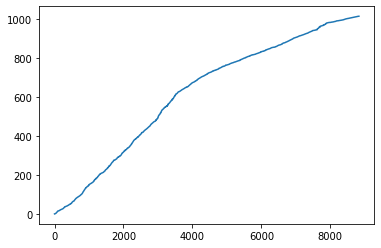

In [15]:
budget = 100
plt.plot(np.array(gain).cumsum()*budget)

## Con la libreria

Sono un po' diversi, forse per il numero di bit? Sotto 32 sopra 64

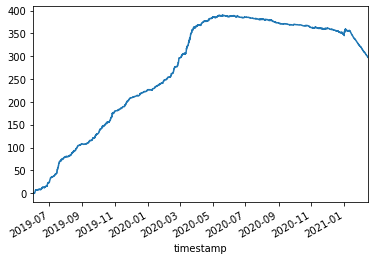

In [33]:
technical.ultimate(df.close, df.low, df.high, buylevel=30, selllevel=70, days=7, getgains=True, commissions=0.0004).cumsum().plot()

In [17]:
policy = technical.ultimate(df.close, df.low, df.high, buylevel=30, selllevel=70, days=7, strategy=True, commissions=0)

In [20]:
ult_lib = policy = technical.ultimate(df.close, df.low, df.high, buylevel=30, selllevel=70, days=7, commissions=0)

In [28]:
ult_lib

timestamp
2019-06-01 01:12:00    100.000000
2019-06-01 01:13:00     82.157676
2019-06-01 01:14:00     82.157676
2019-06-01 01:15:00     87.009063
2019-06-01 01:16:00     87.009063
                          ...    
2021-02-14 23:56:00      0.000000
2021-02-14 23:57:00      0.000000
2021-02-14 23:58:00      0.000000
2021-02-14 23:59:00      0.000000
2021-02-15 00:00:00      0.000000
Length: 241255, dtype: float64

In [27]:
ult.dropna()

timestamp
2019-06-01 01:12:00    100.000000
2019-06-01 01:13:00     82.157676
2019-06-01 01:14:00     82.157676
2019-06-01 01:15:00     87.009063
2019-06-01 01:16:00     87.009063
                          ...    
2021-02-14 23:56:00      0.000000
2021-02-14 23:57:00      0.000000
2021-02-14 23:58:00      0.000000
2021-02-14 23:59:00      0.000000
2021-02-15 00:00:00      0.000000
Length: 296003, dtype: float64

### Test ticket orario

In [18]:
df_hour_ticket = df.close.iloc[::60]
df_hour_high = df.high.rolling(60).max().iloc[::60]
df_hour_low = df.high.rolling(60).min().iloc[::60]

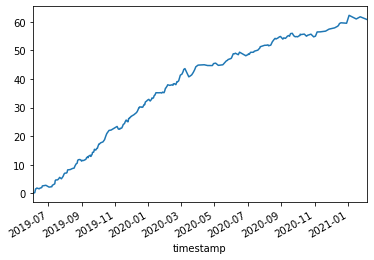

In [19]:
technical.ultimate(df_hour_ticket, df_hour_low, df_hour_high, buylevel=30, selllevel=70, days=7, getgains=True, commissions=0).cumsum().plot()